$\mathbf{1.}$ Write the function  g(x)  in the form $ x^\top A x + b^\top x + c $, where $ x \in \mathbb{R}^2$, A  is a symmetric matrix of size $ (2 \times 2) $, \($ b \in \mathbb{R}^2 $\), and \($ c \in \mathbb{R} $\). Also, find the minimizer and the minimum function value of each of  f(x)  and  g(x) .


$g(x) =  (x_1 + 49)^2 + (x_2 − 36)^2$ \\
$g(x) = x_1^2 + 98x_1 + 49^2 +x_2^2 -72x_2 + 36^2$

comparing  with quadratic form :           
$\hspace{3cm}$$ g(x) = x^\top A x + b^\top x + c $  \\
we have:

$ A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $

$ b = \begin{bmatrix} 98 \\ -72 \end{bmatrix} $

$ c = 49^2 + 36^2 $ \\
$ c = 3697 $

$\rule{25cm}{1pt}$



g(x) = $g(x_1,x_2) = (x_1 + 49)^2 + (x_2-36)^2$

$\nabla$ $g(x) = \begin{bmatrix} 2(x_1 + 49) \\ 2(x_2 - 36) \end{bmatrix}$ $= \begin{bmatrix} 0 \\ 0 \end{bmatrix}$\
After equating gradient equal to zero:

$\hspace{3cm}$$
2(x_1 + 49) = 0 \\
2(x_2 - 36) = 0
$

$\hspace{3cm}$ we get
$ x_1 = -49 \\ x_2 = 36 $


$\hspace{1cm}$Minimizer for g(x): ${x_1=-49, x_2= 36}$

$\hspace{1cm}$Minimum function value for g(x)= 0

$\rule{25cm}{1pt}$


$ f(x)  = f(x1, x2) = 256(x_2 -x_1^2)^2 + (2-x_1)^2$ \\

\\
$ \nabla$ $f(x) = \begin{bmatrix} -1024(x_2 - x_1^2)x_1 - 2(2 - x_1) \\ 512(x_2 - x_1^2) \end{bmatrix}= \begin{bmatrix} 0 \\ 0  \end{bmatrix}$

\\

 After equating gradient equal to zero :

$\hspace{2cm}$$-1024(x_2 - x_1^2)x_1 - 2(2 - x_1) = 0 \\
   512(x_2 - x_1^2) = 0$


$\hspace{2cm}$ we get $ x_1=2$  and  $x_2=4$   



$\hspace{2cm}$Minimizer for f(x):  ${x_1=2 ,  x_2=4}$

$\hspace{2cm}$Minimum function value for f(x)= 0

$\mathbf{2.}$ Find the analytical solution to $\min_{\alpha \geq 0} g(x - \alpha \nabla g(x))$ in closed form. Also prove or disprove that the analytical
solution to $\min_{\alpha \geq 0} f(x - \alpha \nabla f(x))$ can be found in closed form.



$\hspace{1cm}$$g(x_1,x_2) = (x_1 + 49)^2 + (x_2 - 36)^2$ \\
$\hspace{2cm}$$\nabla$ $g(x) = \begin{bmatrix} 2(x_1 + 49) \\ 2(x_2 - 36) \end{bmatrix}$

$Now$

$\min_{\alpha \geq 0} g(x - \alpha \nabla g(x)) =\min_{\alpha \geq 0} [(x_1(1 - 2\alpha) - 98\alpha + 49)^2 +(x_2(1 - 2\alpha) - 72\alpha - 36)^2]$

$\hspace{3cm}$So Analytically , $\alpha = \frac{1}{2}$

$\rule{25cm}{1.5pt}$

$ f(x) = f(x_1, x_2) = 256(x_2 -x_1^2)^2 + (2-x_1)^2$ \\

\\
$ \nabla$ $f(x) = \begin{bmatrix} -1024(x_2 - x_1^2)x_1 - 2(2 - x_1) \\ 512(x_2 - x_1^2) \end{bmatrix}$


$ f(x - \alpha \nabla f(x))=f(z_1,z_2)$  $say$

where, $z_1= x_1 - \alpha \frac{\partial f}{\partial x_1}= x_1-\alpha[-1024(x_2 - x_1^2)x_1 - 2(2 - x_1)]
$

and  $z_2= x_2 - \alpha \frac{\partial f}{\partial x_2}=x_2 - \alpha[512(x_2 - x_1^2)]
$

Let
$h(\alpha)=f(z_1,z_2) =256(z_2 -z_1^2)^2 + (2-z_1)^2 $


We see that this function cannot be even shown convex and we are unable to find any close form solution.



$\mathbf{3.}$ Implement Algorithm - 1 for function g(x), starting from the initial point $x_0$ = (36, −49), explore a range
of tolerances $\tau$ = $10^{-p}$
for p = 1, 2, . . . , 15. Record the number of iterations required for the algorithm to
converge for each tolerance. Generate a plot illustrating the relationship between the number of iterations and
the tolerance values. Compare and contrast this plot with those obtained for the same function g(x) using the
Algorithm - 2 of LAB-01 where fixed step length value (η = 0.001) was used. Plot the level sets of the
function g(x) and also plot the trajectory of the optimization on the same plot for both exact line search method
and the fixed step length method of gradient descent algorithm and report your observations

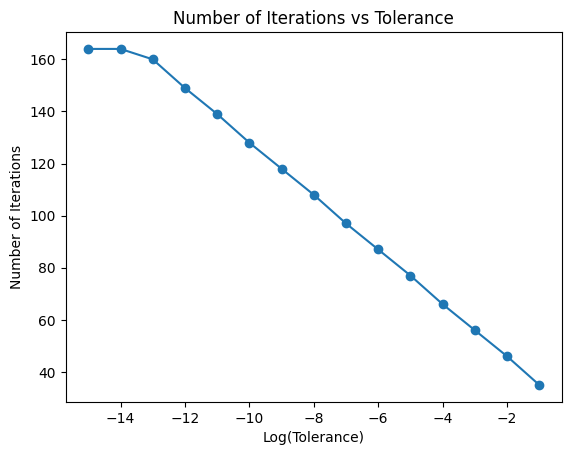

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_g(x):
    return np.array([2*(x[0] + 49), 2*(x[1] - 36)])

def line_search(x, p, alpha_init=1.0, rho=0.9, c=0.0001):
    alpha = alpha_init
    grad = gradient_g(x)
    while g(x + alpha * p) > g(x) + c * alpha * np.dot(grad, p):
        alpha = rho * alpha
    return alpha

def gradient_descent_with_line_search(x0, tolerance):
    x = np.array(x0)
    iterations = 0
    while np.linalg.norm(gradient_g(x)) > tolerance:
        p = -gradient_g(x)
        alpha = line_search(x, p)
        x = x + alpha * p
        iterations += 1
    return iterations

# Explore a range of tolerances
tolerances = [10**(-p) for p in range(1, 16)]
iteration_counts = []

# Run gradient descent for each tolerance
for tol in tolerances:
    iterations = gradient_descent_with_line_search([36, -49], tol)
    iteration_counts.append(iterations)

# Plot the results
plt.plot(np.log10(tolerances), iteration_counts, marker='o')
plt.xlabel('Log(Tolerance)')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Tolerance')
plt.show()


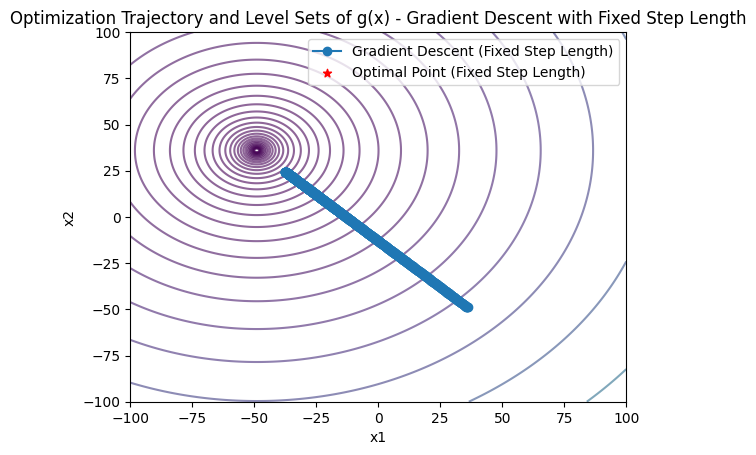

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function g(x)
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

# Gradient of g(x)
def gradient_g(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

# Gradient Descent Algorithm with Fixed Step Length
def gradient_descent_fixed_step(x0, eta, max_iterations=1000, tolerance=1e-5):
    x = x0
    trajectory = [x]

    for k in range(max_iterations):
        gradient = gradient_g(x)
        x = x - eta * gradient
        trajectory.append(x)

        if np.linalg.norm(gradient) < tolerance:
            break

    return x, trajectory

# Initial point
x0 = np.array([36, -49])

# Fixed step length for Gradient Descent
eta_fixed = 0.001

# Run Gradient Descent with Fixed Step Length
result_fixed, trajectory_fixed = gradient_descent_fixed_step(x0, eta_fixed)

# Plot the level sets of the function g(x)
x1 = np.linspace(-100, 100, 400)
x2 = np.linspace(-100, 100, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = (X1 + 49)**2 + (X2 - 36)**2

plt.contour(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='viridis', alpha=0.6)

# Plot the trajectory of optimization for Gradient Descent (Fixed Step Length)
trajectory_fixed = np.array(trajectory_fixed)
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], marker='o', label='Gradient Descent (Fixed Step Length)')

plt.scatter(*result_fixed, color='red', marker='*', label='Optimal Point (Fixed Step Length)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Optimization Trajectory and Level Sets of g(x) - Gradient Descent with Fixed Step Length')
plt.legend()
plt.show()


$\textbf{4.}$ What may be the shortcomings of this algorithm and suggests a possible solution to deal with it ? (Hint: Use
the answer of the part 2.)

When we are unable to find solution analytically and function is not in closed form then we apply algorithm 1 i.e. Gradient Descent line search .

Shortcomings of the Algorithm:
The algorithm described in Exercise 1 is a gradient descent procedure with line search. However, it has some shortcomings:

Dependency on Line Search Accuracy: The efficiency and convergence of the algorithm heavily depend on the accuracy of the line search. If the line search is not performed accurately, it may lead to suboptimal step lengths and slower convergence.

Computational Cost of Line Search: The line search involves minimizing a one-dimensional function, which can be computationally expensive. This cost becomes significant in high-dimensional optimization problems.

Sensitivity to Initial Guess: Like many optimization algorithms, the performance of gradient descent can be sensitive to the choice of the initial guess. Poor initial guesses may result in slow convergence or convergence to local minima.

Possible Solution:
To address the shortcomings mentioned above, a possible solution is to combine the gradient descent procedure with a more sophisticated line search technique, such as the backtracking line search or the Wolfe conditions. These techniques aim to ensure sufficient decrease in the objective function and control the step length more effectively.


Observations:

The backtracking line search can improve the convergence speed and reduce the sensitivity to the choice of the step length.
It adds an adaptive mechanism to the algorithm, dynamically adjusting the step length based on the local behavior of the objective function.